<a href="https://colab.research.google.com/github/HarjodhsGitHub/Machine-Learning-/blob/main/WineTypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [ ]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

In [ ]:
red['type'] = 1
white['type'] = 0

wines = pd.concat([red, white], ignore_index=True)
wines.dropna(inplace=True)

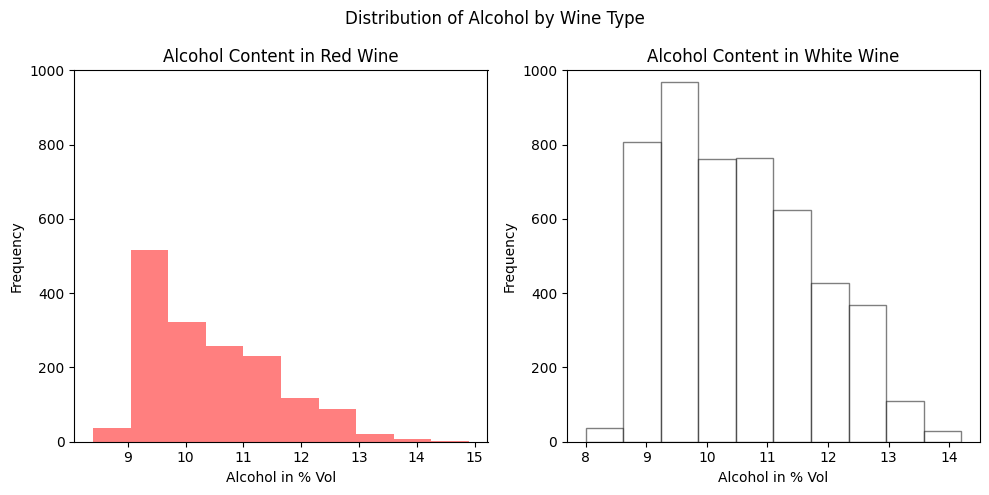

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(wines[wines['type'] == 1].alcohol, bins=10, facecolor='red', alpha=0.5, label='Red wine')
ax[1].hist(wines[wines['type'] == 0].alcohol, bins=10, facecolor='white', edgecolor='black', lw=0.5, alpha=0.5, label='White wine')

for a in ax:
    a.set_ylim([0, 1000])
    a.set_xlabel('Alcohol in % Vol')
    a.set_ylabel('Frequency')

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle('Distribution of Alcohol by Wine Type')
plt.tight_layout()
plt.show()

In [ ]:
X = wines.iloc[:, :-1]
y = wines['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=45)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(9,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=3,batch_size=1,verbose=1)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8466 - loss: 0.9729
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9321 - loss: 0.2019
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9356 - loss: 0.1816


In [ ]:
model.evaluate(X_test,  y_test, verbose=2)

70/70 - 1s - 15ms/step - accuracy: 0.9407 - loss: 0.1612


[0.16115474700927734, 0.9406971335411072]

In [ ]:
y_pred = model.predict(X_test)

print("Predictions: ", y_pred)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Predictions:  [[0.04708681]
 [0.01545195]
 [0.00949299]
 ...
 [0.02996481]
 [0.02970394]
 [0.00300217]]


In [ ]:
X_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2691            7.1              0.21         0.40            1.20      0.069   
5843            7.6              0.36         0.48           13.50      0.038   
5509            7.1              0.37         0.30            6.20      0.040   
2880            7.7              0.27         0.34            1.80      0.028   
3286            7.3              0.26         0.33           17.85      0.049   
...             ...               ...          ...             ...        ...   
5443            6.7              0.37         0.25            2.50      0.028   
5184            7.0              0.24         0.35            1.00      0.032   
5308            6.7              0.31         0.09            1.40      0.039   
3303            6.7              0.31         0.42            6.40      0.057   
3582            7.6              0.20         0.30           14.20      0.056   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2691                 24.0                 156.0  0.99280  3.42       0.43   
5843                 44.0                 116.0  0.99820  3.04       0.48   
5509                 49.0                 139.0  0.99021  3.17       0.27   
2880                 26.0                 168.0  0.99110  2.99       0.48   
3286                 41.5                 195.0  1.00000  3.06       0.44   
...                   ...                   ...      ...   ...        ...   
5443                 24.0                  84.0  0.99090  3.14       0.36   
5184                 42.0                 104.0  0.98988  3.16       0.37   
5308                 53.0                 141.0  0.99206  3.12       0.44   
3303                 25.0                 148.0  0.99550  3.16       0.45   
3582                 53.0                 212.5  0.99900  3.14       0.46   

      alcohol  quality  
2691     10.6        6  
5843      9.2        5  
5509     13.6        6  
2880     12.1        7  
3286      9.1        7  
...       ...      ...  
5443     11.7        6  
5184     11.7        7  
5308     10.1        5  
3303      9.6        5  
3582      8.9        8  

[2209 rows x 12 columns]